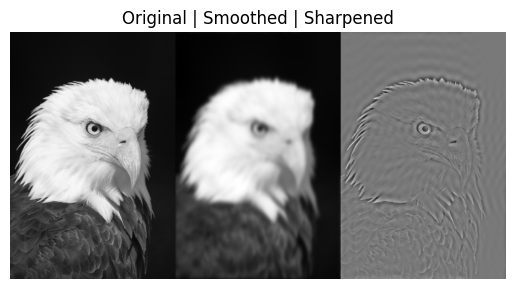

Smoothed image saved at: smoothed_image.jpg
Sharpened image saved at: sharpened_image.jpg


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def apply_gaussian_filter(image, sigma):
    image = np.float32(image)
    frequency_domain = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)
    shifted_frequency_domain = np.fft.fftshift(frequency_domain)
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols, 2), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance_squared = (i - crow) ** 2 + (j - ccol) ** 2
            gaussian_value = np.exp(-distance_squared / (2 * sigma**2))
            mask[i, j] = [gaussian_value, gaussian_value]
    filtered_frequency_domain = shifted_frequency_domain * mask
    shifted_filtered_frequency_domain = np.fft.ifftshift(filtered_frequency_domain)
    filtered_image = cv2.idft(
        shifted_filtered_frequency_domain, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT
    )
    filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(filtered_image)


def apply_sharpening_filter(image, strength):
    image = np.float32(image)
    frequency_domain = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)
    shifted_frequency_domain = np.fft.fftshift(frequency_domain)
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols, 2), np.float32)
    mask[crow - strength : crow + strength, ccol - strength : ccol + strength] = 0
    filtered_frequency_domain = shifted_frequency_domain * mask
    shifted_filtered_frequency_domain = np.fft.ifftshift(filtered_frequency_domain)
    filtered_image = cv2.idft(
        shifted_filtered_frequency_domain, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT
    )
    filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(filtered_image)


image_path = "./Images.jpg"
input_image = cv2.imread(image_path, 0)
if input_image is None:
    raise FileNotFoundError(
        f"The image '{image_path}' could not be loaded. Check the file path."
    )

sigma = 20
smoothed_image = apply_gaussian_filter(input_image, sigma)

strength = 20
sharpened_image = apply_sharpening_filter(input_image, strength)

combined_image = np.hstack((input_image, smoothed_image, sharpened_image))
plt.imshow(combined_image, cmap="gray")
plt.title("Original | Smoothed | Sharpened")
plt.axis("off")
plt.show()

smoothed_path = "smoothed_image.jpg"
sharpened_path = "sharpened_image.jpg"
cv2.imwrite(smoothed_path, smoothed_image)
cv2.imwrite(sharpened_path, sharpened_image)

print(f"Smoothed image saved at: {smoothed_path}")
print(f"Sharpened image saved at: {sharpened_path}")